In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(1, "../")
from _shear_frame import ShearFrame_3D
from _generate_time_series import *
from utils_OB import *
import random
import _tracking as tk

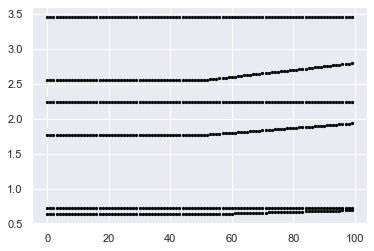

In [2]:
kx=np.array([2,2,2])
ky=np.array([2.5,2.5,5])
m=np.array([1,1,1])


n=100
shapey=np.ones(n)
shapex=np.hstack((np.ones(n//2),np.linspace(1,1.2,n//2)))
true_w,_=generate_dynamic_series(kx,ky,shapex,shapey,m,plot=True)

In [10]:
temp = np.zeros([true_w.shape[0], 14])

data_noised = np.hstack([true_w, temp])

for i, row in enumerate(data_noised):
    for j in range(true_w.shape[1], data_noised.shape[1]):
        data_noised[i,j] = np.random.normal(2,0.5)

(100, 6)


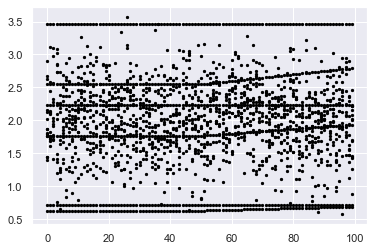

In [12]:
t=range(len(data_noised))
for i,ti in enumerate(t):
    plt.scatter(np.ones(len(data_noised[i]))*ti,data_noised[i],c='black',s=5)
plt.show()

In [13]:
F_test = tk.trackingGaussian(true_w.T, Bf = 0.05, N_lim=15, Nt = 20)

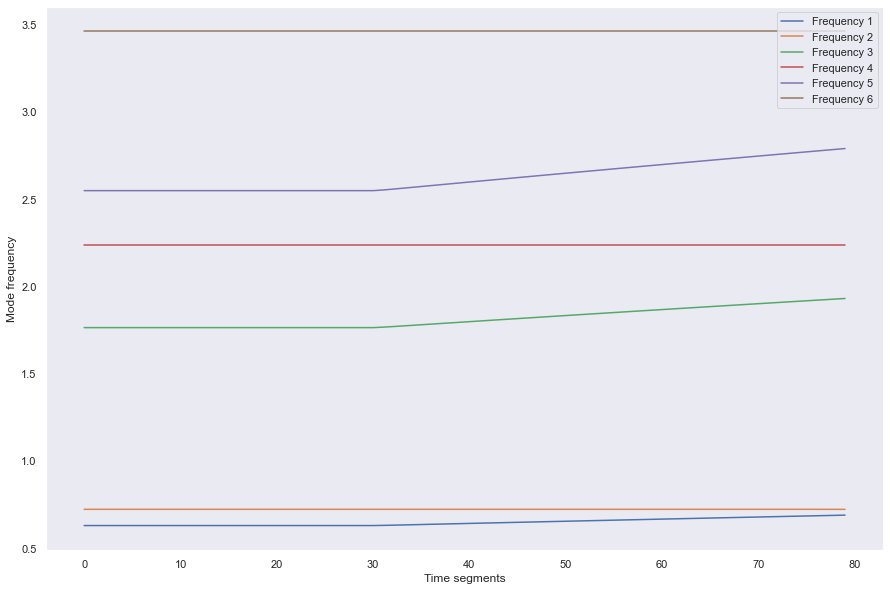

In [14]:
tk.tracking_plot(F_test)

In [22]:
F_all = true_w.T
Bf = 0.05
N_lim = 15
Nt = 20

F_initial_test = F_all[:,:Nt] 
Nbins = int(np.ceil((F_initial_test.max() - F_initial_test.min())/Bf))

hist, bin_edges = np.histogram(F_initial_test, bins = Nbins, density = False)
#print(hist, bin_edges)

id = np.array([i for i, v in enumerate(hist >= N_lim) if v])

found_bin_edges = np.array([])
for i in id:
    found_bin_edges = np.append(found_bin_edges, np.array([bin_edges[i], bin_edges[i+1]]))
found_bin_edges = found_bin_edges.reshape((int(found_bin_edges.shape[0]/2), 2))

F_initial_flat = F_initial_test.flatten()

f0 = np.array([])

for f_start, f_end in found_bin_edges:
    id_f = np.where(np.logical_and(F_initial_flat <= f_end, F_initial_flat >= f_start)) #Indices of frequencies in the bin
    f0 = np.append(f0, np.mean(F_initial_flat[id_f])) #Mean of the frequencies in the bin

print(true_w.T[:,0])
print(f0)


[0.62938425 1.76349547 2.54832478 0.72234367 2.23606798 3.46095646]
[0.62938425 0.72234367 1.76349547 2.23606798 2.54832478 3.46095646]
